# Egyptian Characters Plate OCR

In [1]:
!nvidia-smi

Fri Apr 19 18:30:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5608.0/8062.4 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/kaggle/working
100%|███████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 103MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 48.5MB/s]
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 122.5ms
Speed: 12.5ms preprocess, 122.5ms inference, 474.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/kaggle/working


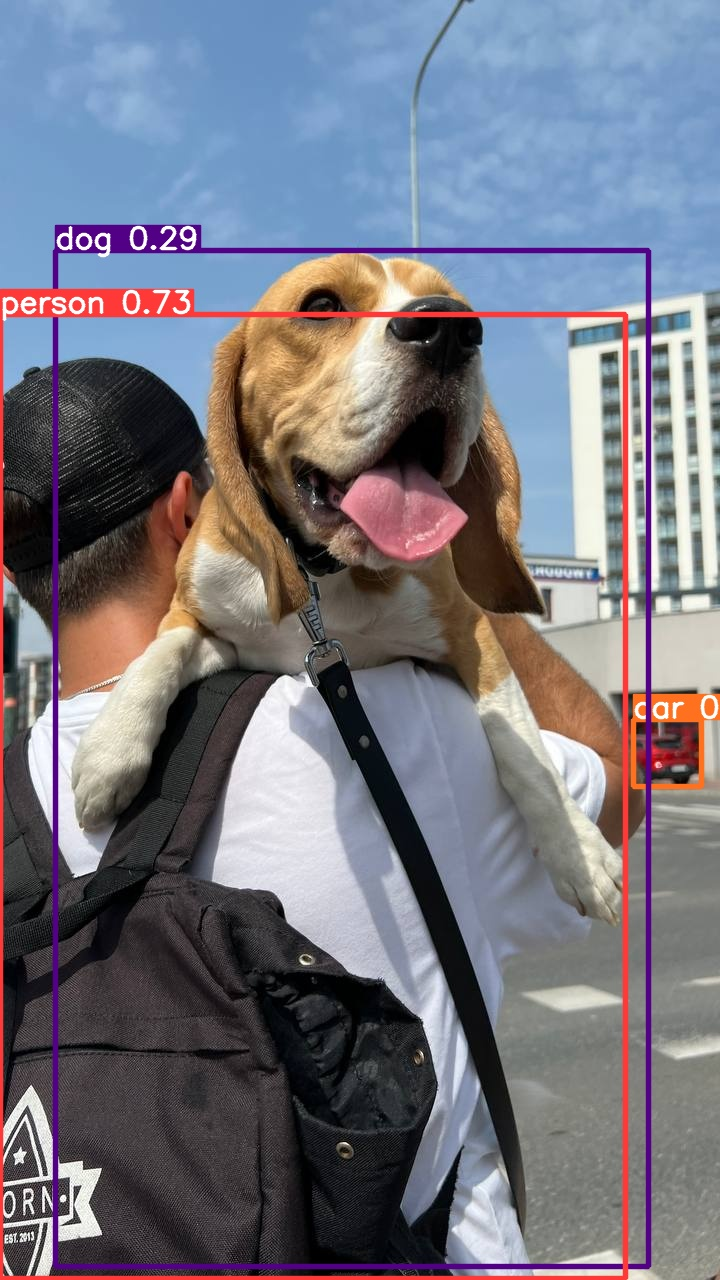

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [9]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4716,  625.0755, 1278.1947],
        [  55.1730,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("alyalsayed").project("egyptian-car-plates")
version = project.version(9)
dataset = version.download("yolov8")


/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.1.6 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.2 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you ha


Extracting Dataset Version Zip to egyptian-car-plates-9 in yolov8:: 100%|██████████| 7460/7460 [00:00<00:00, 10321.67it/s]


## Custom Training

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 200MB/s]
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/egyptian-car-plates-9/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_c

In [14]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch2445.jpg
R_curve.png					  train_batch2446.jpg
args.yaml					  train_batch2447.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1713551518.2b253237cdb9.90.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


/kaggle/working


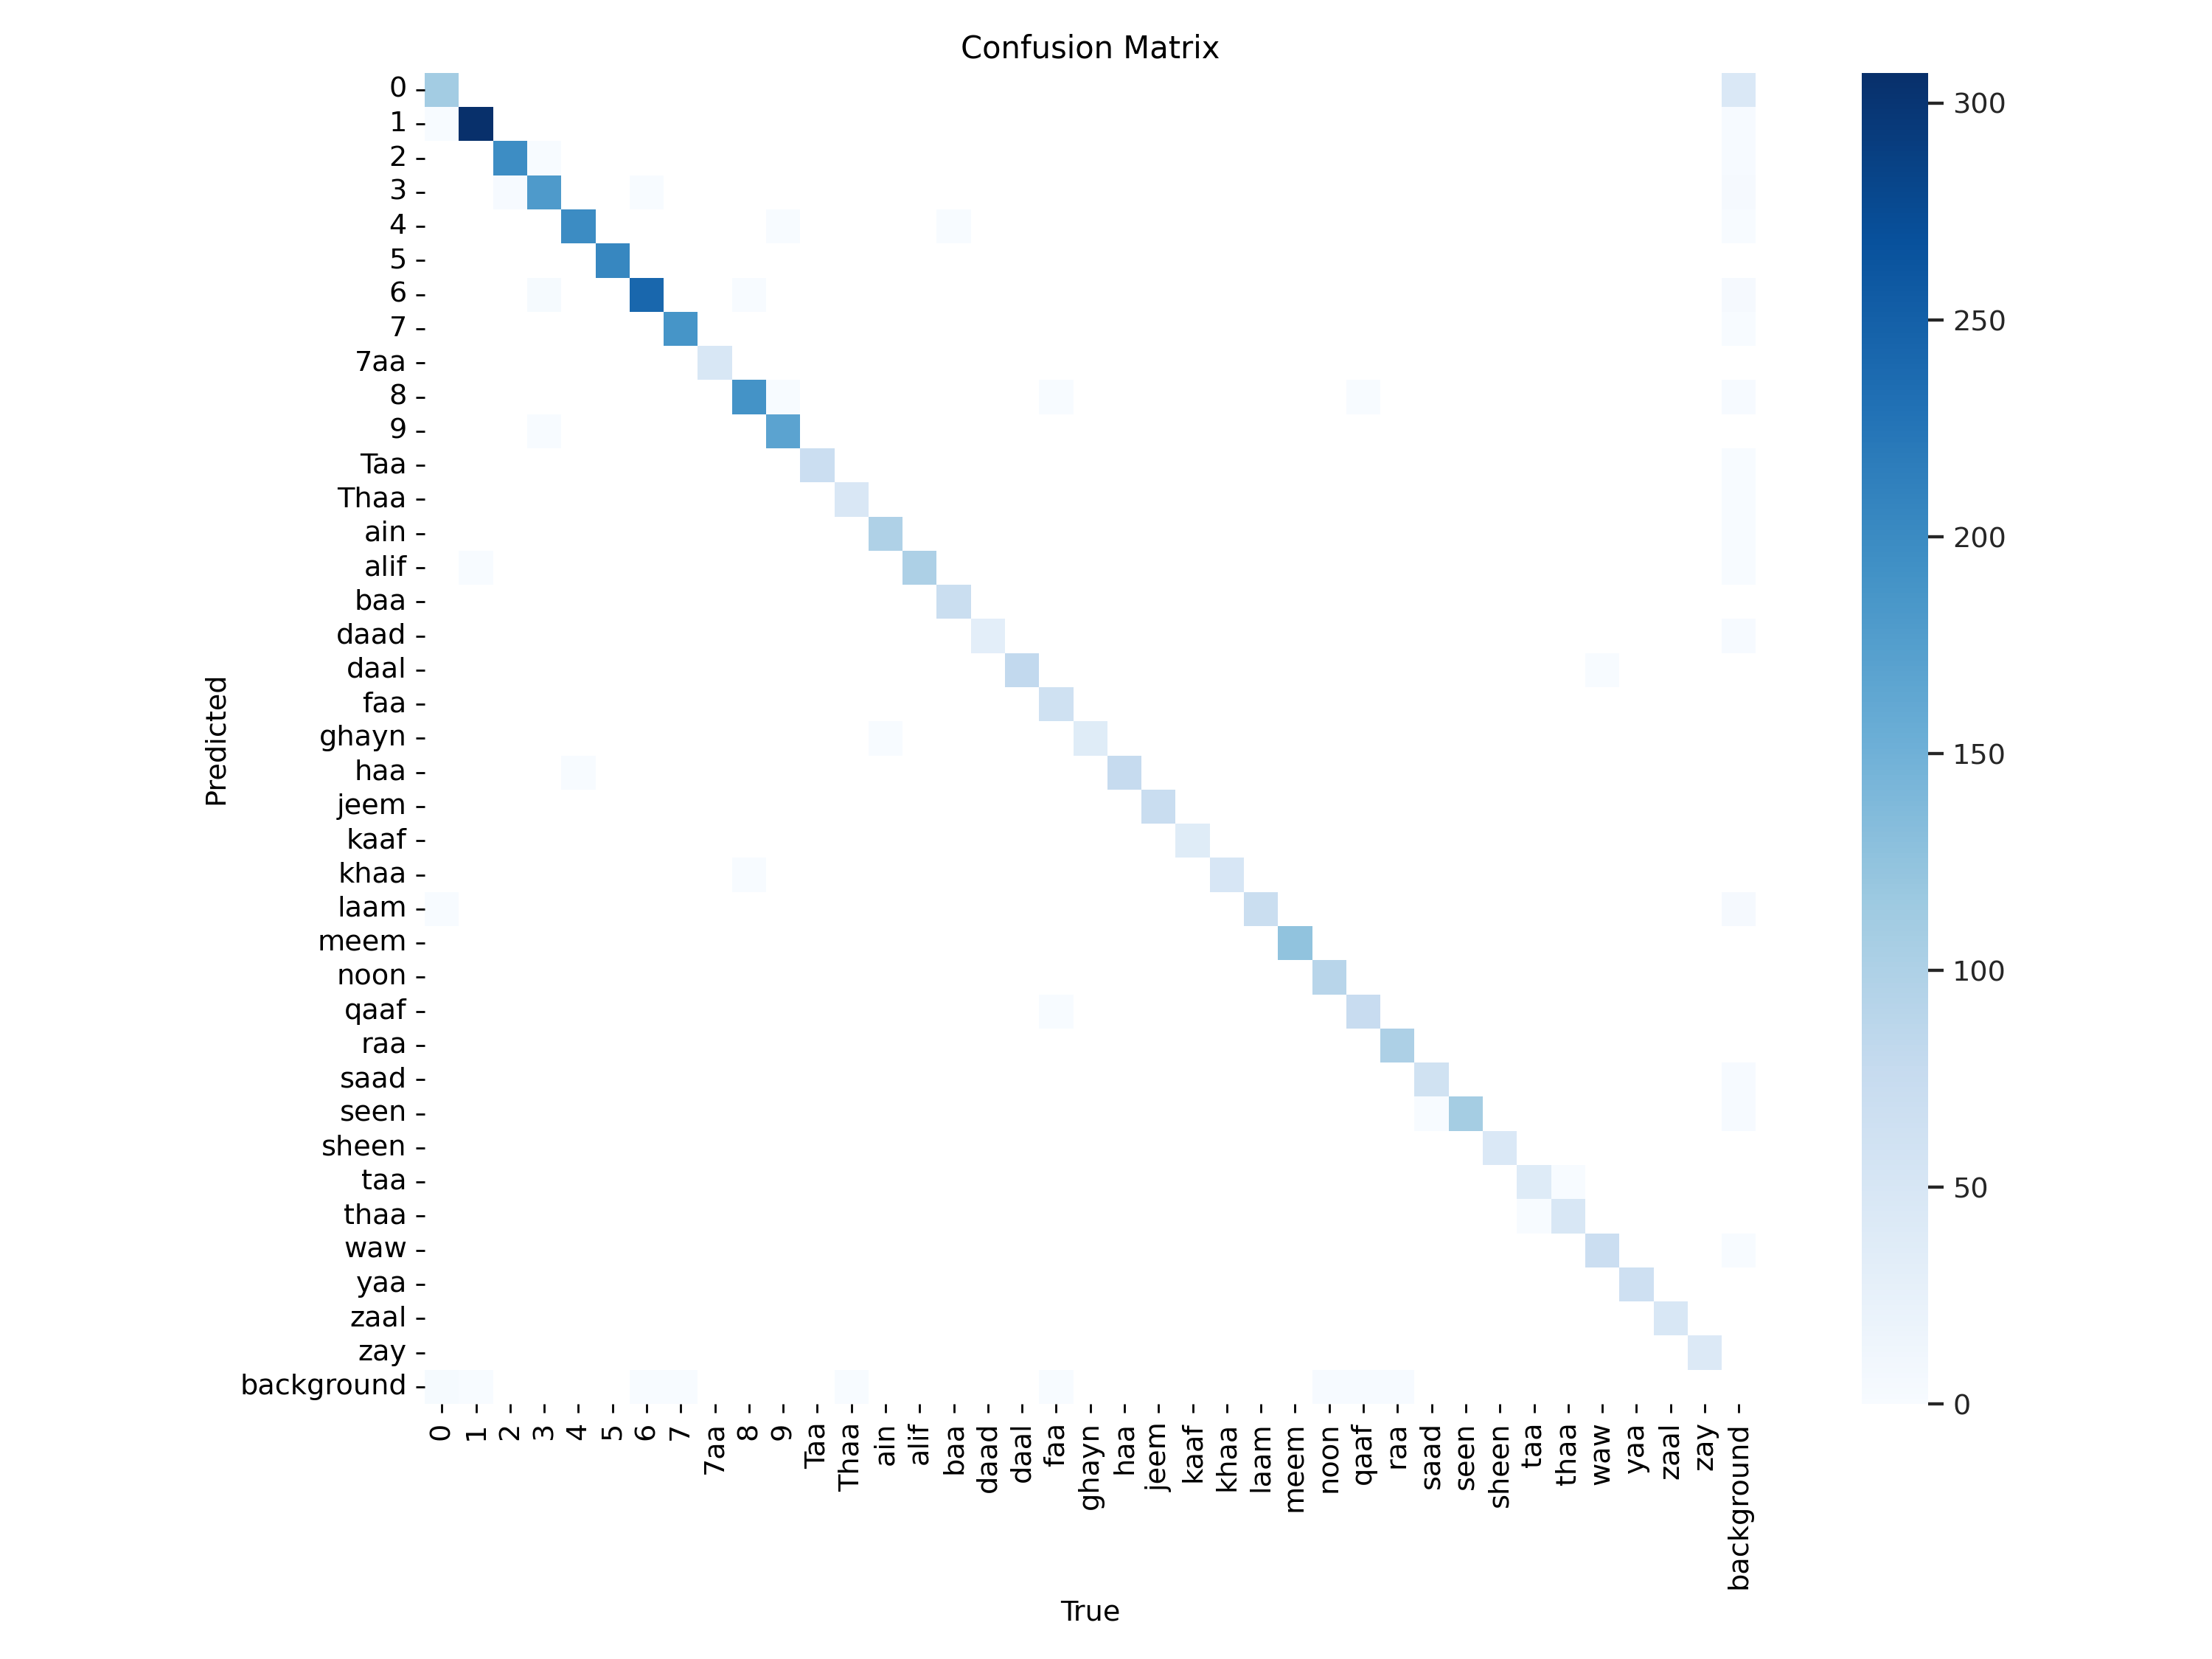

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


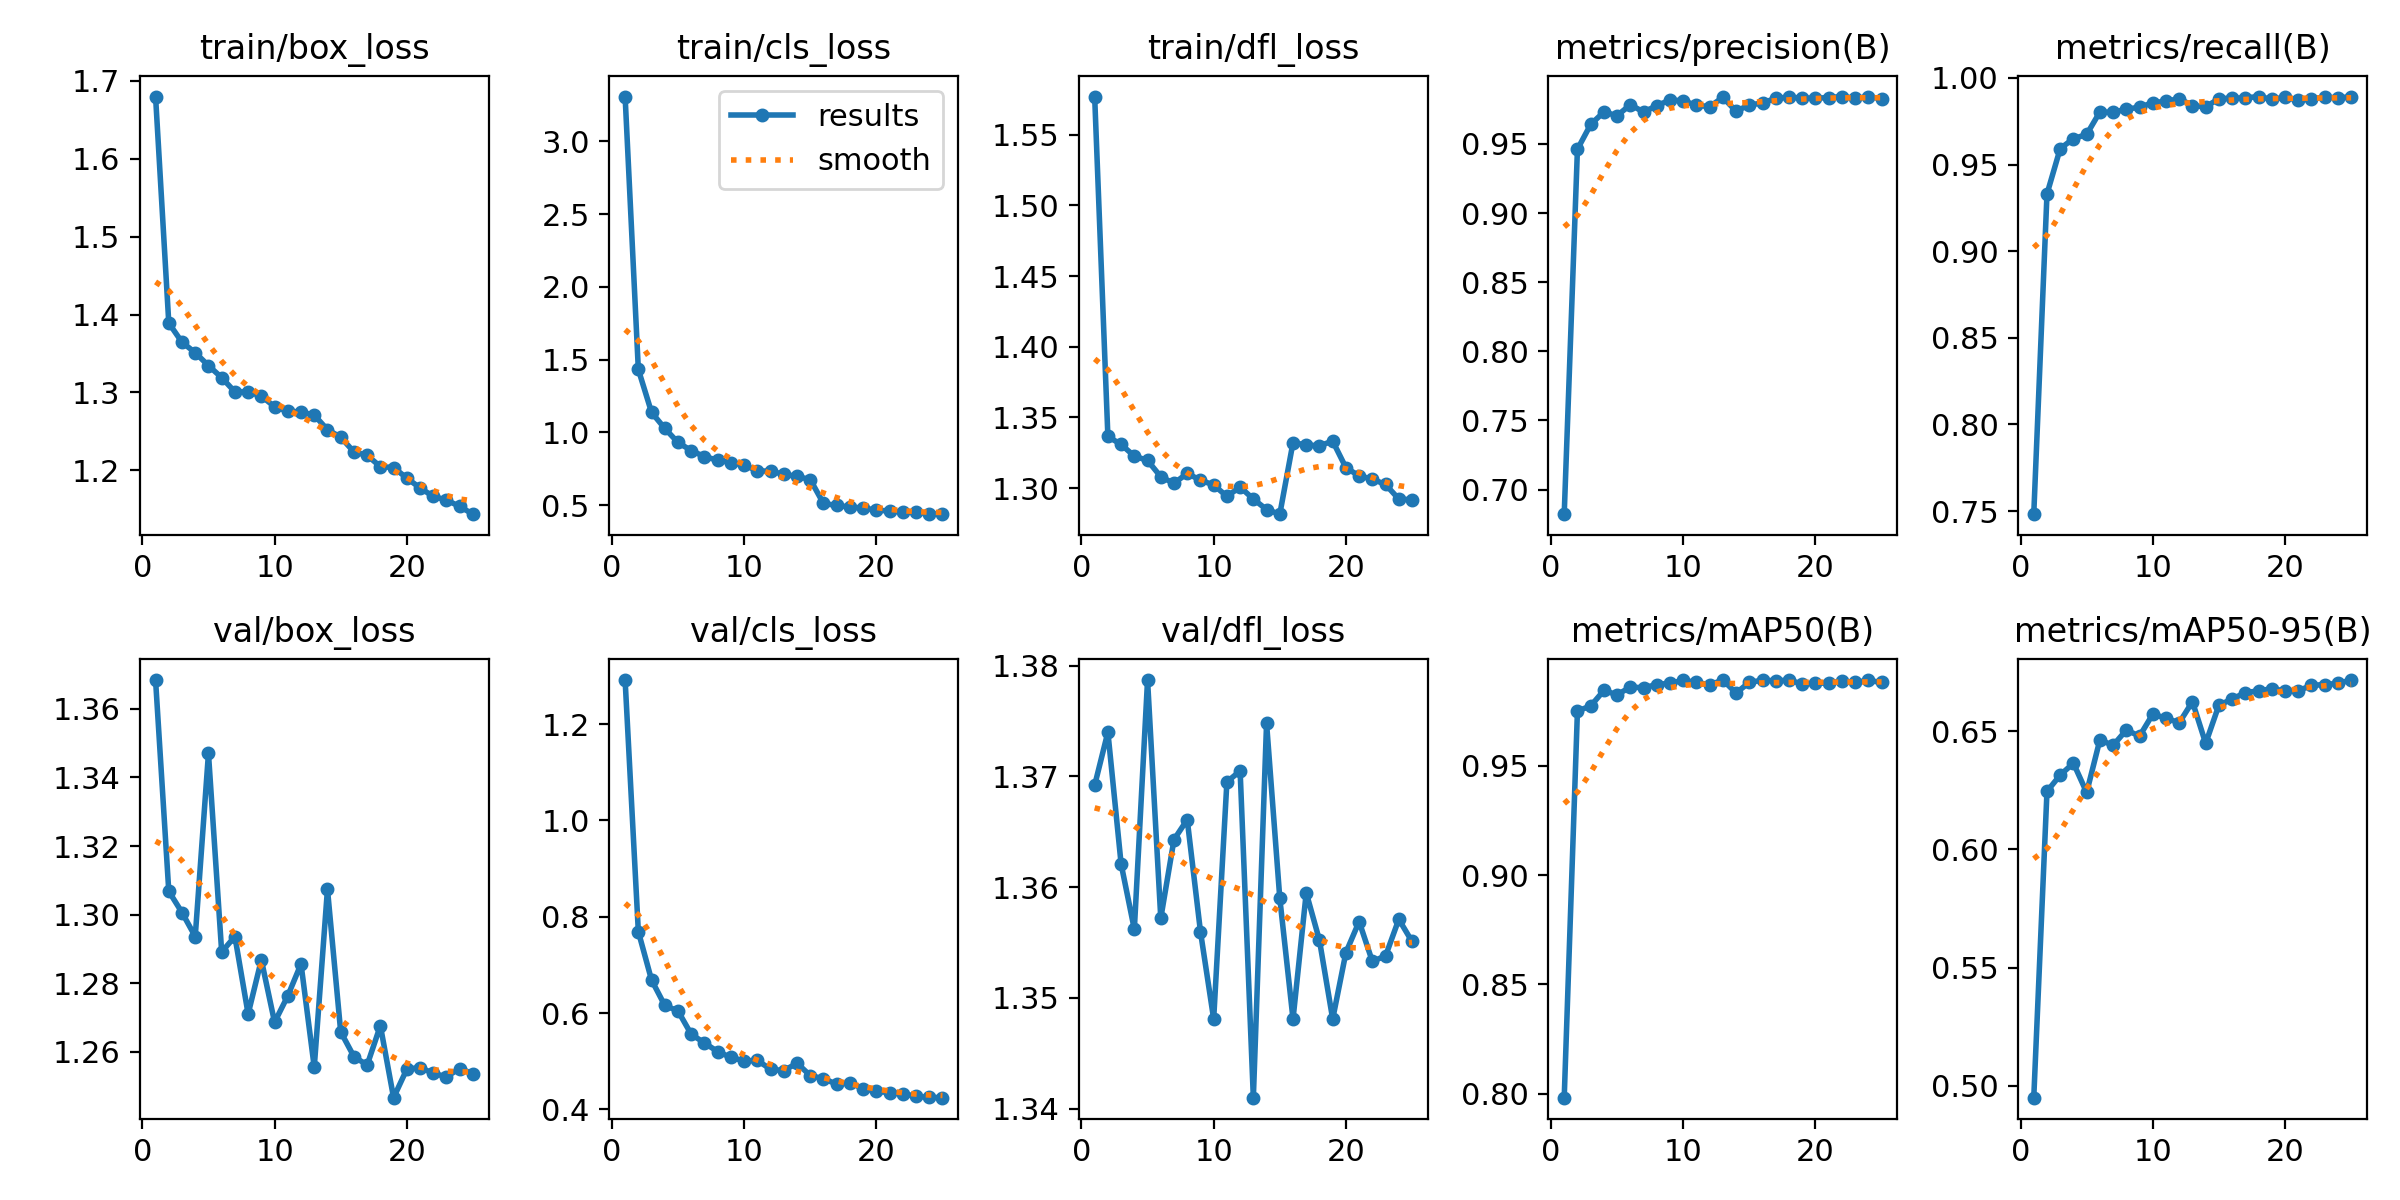

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


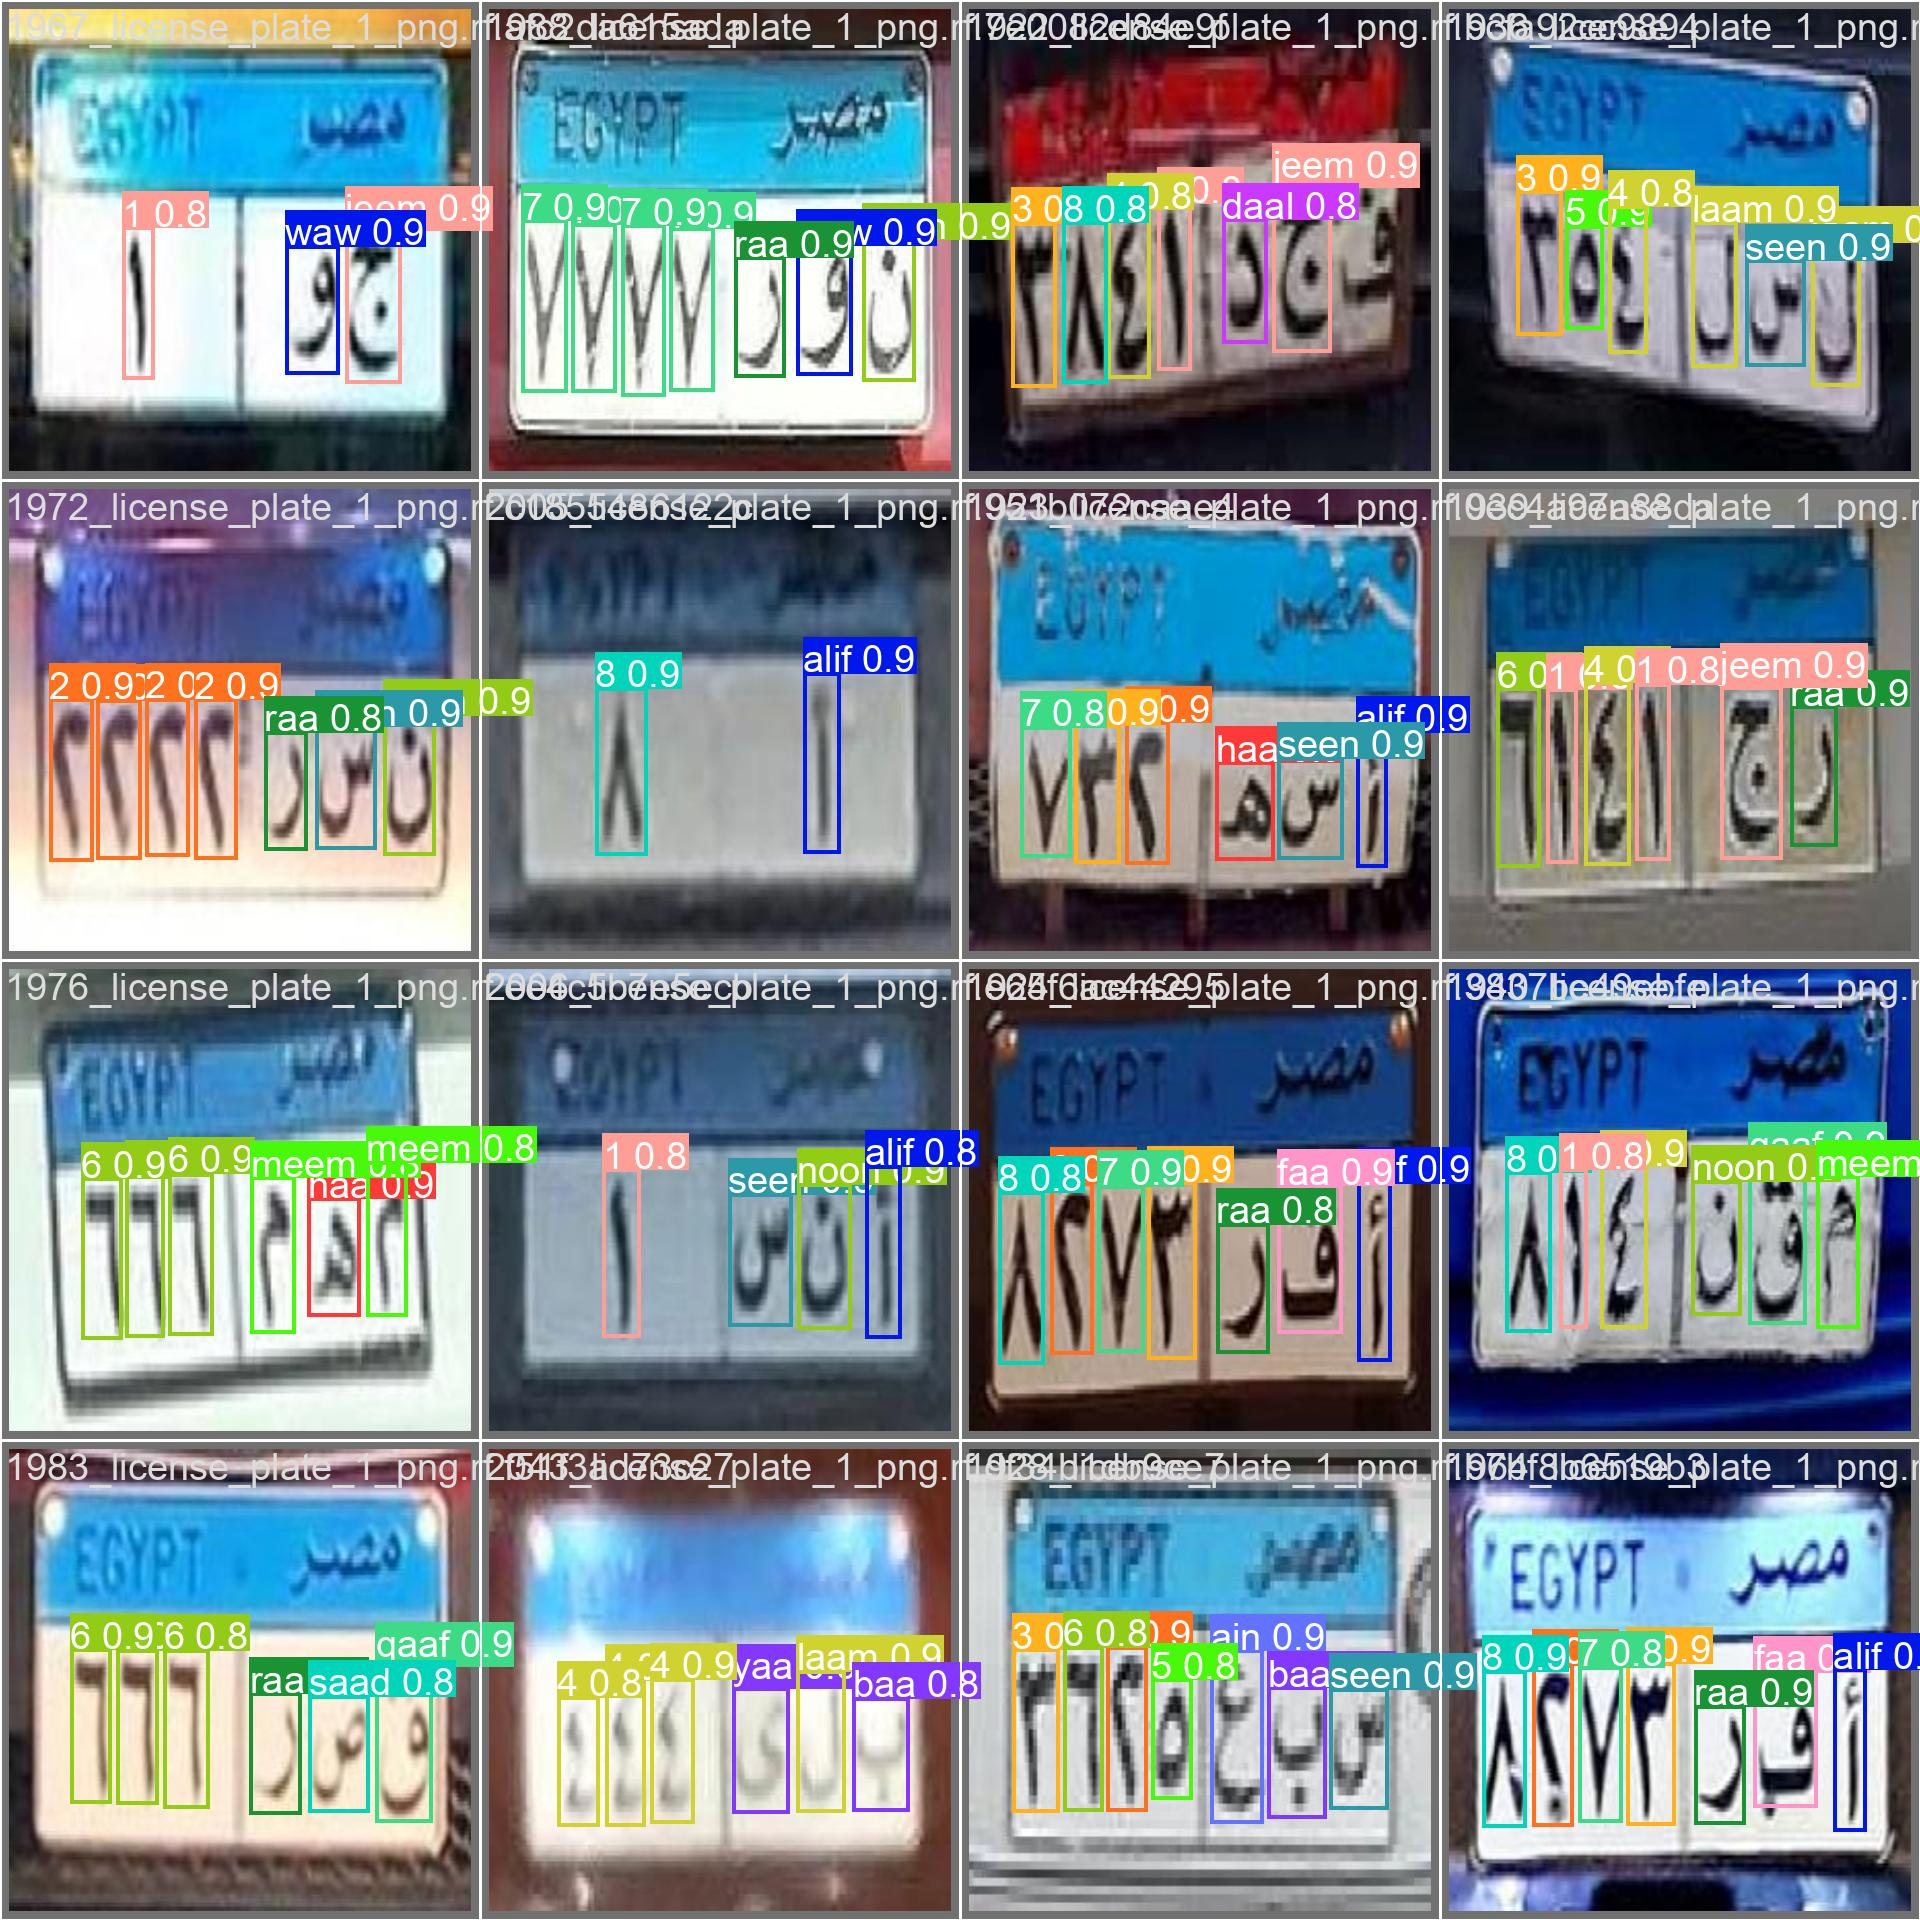

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11140290 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/datasets/egyptian-car-plates-9/valid/labels.cache.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        745       3894      0.983      0.989      0.988      0.672
                     0        745        116      0.916      0.914      0.887      0.401
                     1        745        309      0.987      0.987       0.99      0.559
                     2        745        199       0.98      0.985      0.985      0.643
                     3        745        186      0.984      0.983      0.986      0.657
                     4        745        200      0.978       0.99      0.987      0.616
                     5        745        204      0.993      0.995      0.995      0.646
                     6  

## Inference with Custom Model

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11140290 parameters, 0 gradients, 28.5 GFLOPs

image 1/371 /kaggle/working/datasets/egyptian-car-plates-9/test/images/00007_jpg.rf.84a7d1fa919078d79dd1f1e23c8864c1.jpg: 800x800 1 1, 1 3, 1 7, 1 9, 1 ghayn, 1 seen, 9.8ms
image 2/371 /kaggle/working/datasets/egyptian-car-plates-9/test/images/00013_jpg.rf.55d0b239594f76ee933deedce010b7c5.jpg: 800x800 1 5, 1 ghayn, 1 jeem, 1 sheen, 9.6ms
image 3/371 /kaggle/working/datasets/egyptian-car-plates-9/test/images/00017_jpg.rf.6d17a97e8a1e1acb0747f0d3e89e457d.jpg: 800x800 1 4, 1 5, 1 7aa, 1 9, 1 laam, 9.6ms
image 4/371 /kaggle/working/datasets/egyptian-car-plates-9/test/images/00025_jpg.rf.0ae28ebfc5ce77d5c9db89ad317b52d4.jpg: 800x800 1 2, 1 haa, 1 laam, 1 thaa, 9.6ms
image 5/371 /kaggle/working/datasets/egyptian-car-plates-9/test/images/00032_jpg.rf.cff61969338e6522add85779bab5670f.jpg: 800x800 1 7aa, 1

**NOTE:** Let's take a look at few results.

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [21]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [22]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [23]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 01710_jpg.rf.5302b9ce75b652b2dc1b987b67ff3073.jpg


{'predictions': [{'x': 142.0,
   'y': 137.0,
   'width': 34.0,
   'height': 52.0,
   'confidence': 0.8032560348510742,
   'class': 'noon',
   'class_id': 26,
   'detection_id': 'ebf34724-7a52-452a-9594-ba7ca48db37e',
   'image_path': '/kaggle/working/datasets/egyptian-car-plates-9/test/images/01710_jpg.rf.5302b9ce75b652b2dc1b987b67ff3073.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 210.5,
   'y': 110.0,
   'width': 27.0,
   'height': 42.0,
   'confidence': 0.7874526977539062,
   'class': 'daal',
   'class_id': 17,
   'detection_id': 'd56d7194-f259-4683-909e-0c36dd0c2e18',
   'image_path': '/kaggle/working/datasets/egyptian-car-plates-9/test/images/01710_jpg.rf.5302b9ce75b652b2dc1b987b67ff3073.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 69.5,
   'y': 160.5,
   'width': 27.0,
   'height': 49.0,
   'confidence': 0.7589556574821472,
   'class': '4',
   'class_id': 4,
   'detection_id': '5808b935-785b-452e-b422-770b30fa5e31',
   'image_path': '/kaggle/workin